In [1]:
from pydlm import dlm, trend, seasonality
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv("Linkou.csv", index_col='ds', parse_dates=["ds"])
df.head()

,y
ds,
2007-10-09,325
2007-10-10,417
2007-10-11,556
2007-10-12,467
2007-10-13,430


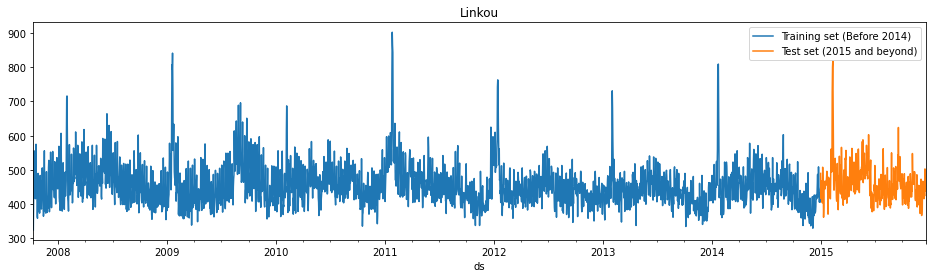

In [3]:
import matplotlib.pyplot as plt
# Plot the training set
df["y"][:'2014'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["y"]['2015':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2014)', 'Test set (2015 and beyond)'])
plt.title('Linkou')
plt.show()

In [4]:
# here we are seperating the data 
trainning_set = df[:'2014'].iloc[:,0:1].values
test_set = df['2015':].iloc[:,0:1].values
trainning_set

array([[325],
       [417],
       [556],
       ...,
       [432],
       [406],
       [429]], dtype=int64)

In [5]:
test_set

array([[490],
       [432],
       [416],
       [467],
       [408],
       [462],
       [404],
       [508],
       [459],
       [430],
       [362],
       [392],
       [467],
       [465],
       [444],
       [465],
       [467],
       [455],
       [455],
       [467],
       [478],
       [496],
       [472],
       [481],
       [429],
       [371],
       [435],
       [478],
       [471],
       [456],
       [440],
       [468],
       [417],
       [416],
       [486],
       [561],
       [530],
       [494],
       [496],
       [727],
       [800],
       [818],
       [692],
       [558],
       [455],
       [441],
       [450],
       [485],
       [497],
       [534],
       [470],
       [505],
       [453],
       [418],
       [409],
       [446],
       [519],
       [483],
       [428],
       [384],
       [421],
       [483],
       [447],
       [540],
       [502],
       [458],
       [436],
       [430],
       [514],
       [440],
       [566],
      

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)
training_set_scaled

array([[0.        ],
       [0.15944541],
       [0.40034662],
       ...,
       [0.18544194],
       [0.14038128],
       [0.18024263]])

In [7]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
X_train

array([[[0.        ],
        [0.15944541],
        [0.40034662],
        ...,
        [0.19410745],
        [0.39341421],
        [0.27729636]],

       [[0.15944541],
        [0.40034662],
        [0.24610052],
        ...,
        [0.39341421],
        [0.27729636],
        [0.19237435]],

       [[0.40034662],
        [0.24610052],
        [0.18197574],
        ...,
        [0.27729636],
        [0.19237435],
        [0.11265165]],

       ...,

       [[0.14384749],
        [0.18370884],
        [0.09705373],
        ...,
        [0.21663778],
        [0.20450607],
        [0.14038128]],

       [[0.18370884],
        [0.09705373],
        [0.05545927],
        ...,
        [0.20450607],
        [0.14038128],
        [0.18544194]],

       [[0.09705373],
        [0.05545927],
        [0.02253033],
        ...,
        [0.14038128],
        [0.18544194],
        [0.14038128]]])

In [11]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

ERROR: Could not install packages due to an OSError: [WinError 5] 存取被拒。: 'c:\\users\\wujin\\anaconda3\\envs\\rstudio\\lib\\site-packages\\~cipy\\.libs\\libansari.54HGNEJBQIYZX5TZPCQGLNVIPFU6NWEX.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import os 
!pip install -U -q segmentation-models --user
os.kill(os.getpid(), 9)

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

ImportError: cannot import name 'Input' from 'keras.engine' (C:\Users\wujin\anaconda3\envs\rstudio\lib\site-packages\keras\engine\__init__.py)

In [13]:
## Load packages
import tensorflow as tf
from tensorflow import keras
import tensorflow.python.keras.backend as K
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from keras import backend
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

ImportError: cannot import name 'Input' from 'keras.engine' (C:\Users\wujin\anaconda3\envs\rstudio\lib\site-packages\keras\engine\__init__.py)

In [42]:
history = regressor.fit(X_train, y_train, epochs=50, batch_size=32)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.